In [208]:
import galsim
import numpy as np
import matplotlib
import pylab

In [209]:
from galsim import RealGalaxy, RealGalaxyCatalog
dir="/Users/maccrann.2/code/GalSim/examples/data"
cosmos_cat = RealGalaxyCatalog(file_name="real_galaxy_catalog_23.5_example.fits", dir=dir)

In [215]:
from matplotlib.patches import Ellipse
BEAMER_COLOR=(0.2,0.2,0.7)
def make_scene(ax, cosmos_cat, nobj=10, psf=None, 
               xsize=100, ysize=70, seed=None,
              add_ellipses=True, asinh_scale=False,
              cmap='gray_r', color=BEAMER_COLOR, scale=None):
    
    rng=galsim.BaseDeviate(seed=seed)
    ud=galsim.UniformDeviate(seed=seed)
    if psf is None:
        psf = galsim.Gaussian(fwhm=0.3, flux=1.)
    
    im = galsim.Image(xsize, ysize)
    xs,ys = [],[]
    for i in range(nobj):
        g = RealGalaxy(cosmos_cat, random=True, flux=1., rng=rng)
        g = galsim.Convolve(g, psf)
        imfit = g.drawImage(scale=scale)
        #g.setFlux(imfit.array.sum()/imfit.array.max())
        
        x,y = xsize*ud(), ysize*ud()
        xs.append(x)
        ys.append(y)
        g.drawImage(image=im, center=galsim.PositionD(x,y),
                   add_to_image = True, gain=imfit.array.max(),
                   scale=scale)
        
        if add_ellipses:
            imfit = g.drawImage()
            moments = imfit.FindAdaptiveMom()
            g = moments.observed_shape
            sigma = moments.moments_sigma
    
            ellipse = Ellipse((x-1, y-1), 
                              2*sigma/g.q**0.5, 2*sigma*g.q**0.5, 
                              angle=g.beta/galsim.degrees, facecolor='none', 
                              edgecolor=BEAMER_COLOR,
                              linewidth=3
                             )
            ax.add_patch(ellipse)
    
    to_plot = im.array
    if asinh_scale:
        to_plot /= (to_plot.max()-to_plot.min())
        to_plot += to_plot.min()
        to_plot = np.arcsinh(10*to_plot)/3
        
    ax.imshow(to_plot, origin='lower', interpolation='nearest', cmap=cmap)   
    ax.axis('off')
    return xs,ys
        
        

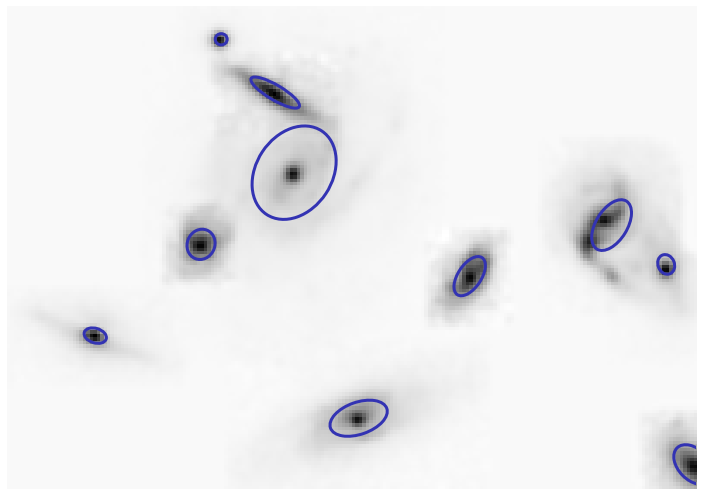

In [216]:
fig=pylab.figure(figsize=(10,7))
ax = fig.add_subplot(111)
psf = galsim.Gaussian(fwhm=0.2,flux=1.)
nobj=10
xsize=200
ysize=140
seed=1235
xs,ys = make_scene(ax, cosmos_cat, nobj=nobj, psf=psf, xsize=xsize, ysize=ysize, seed=seed,
               add_ellipses=True)
fig.tight_layout()
fig.savefig("wl_scene_with_ellipse.pdf")

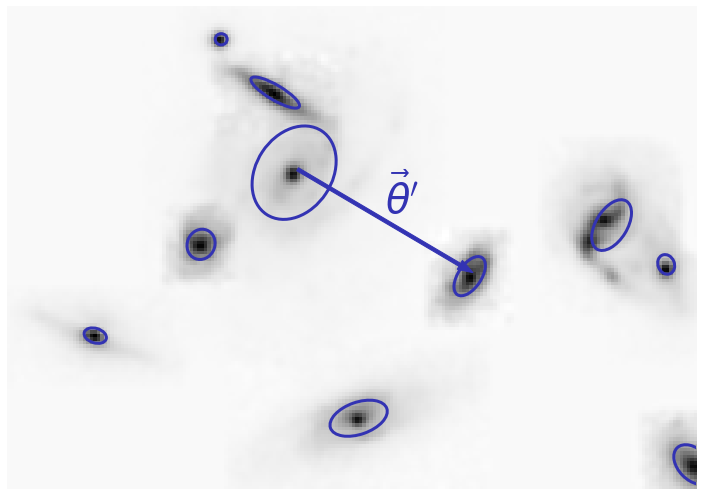

In [207]:
fig=pylab.figure(figsize=(10,7))
ax = fig.add_subplot(111)
xs,ys = make_scene(ax, cosmos_cat, nobj=nobj, psf=psf, xsize=xsize, ysize=ysize, seed=seed,
               add_ellipses=True)
arrow_start_x, arrow_start_y = xs[0],ys[0]
arrow_end_x, arrow_end_y = xs[4],ys[4]
ax.arrow(arrow_start_x, arrow_start_y,
         arrow_end_x-arrow_start_x, arrow_end_y-arrow_start_y, 
         color=BEAMER_COLOR, width=1, length_includes_head=True)
text_x = 0.5*(arrow_start_x+arrow_end_x)
text_y = 0.5*(arrow_start_y+arrow_end_y)
ax.text(text_x, text_y, r"$\vec{\theta}'$", color=BEAMER_COLOR, fontsize=40,
       horizontalalignment='left', verticalalignment='bottom')
fig.tight_layout()
fig.savefig("wl_scene_with_arrow.pdf")

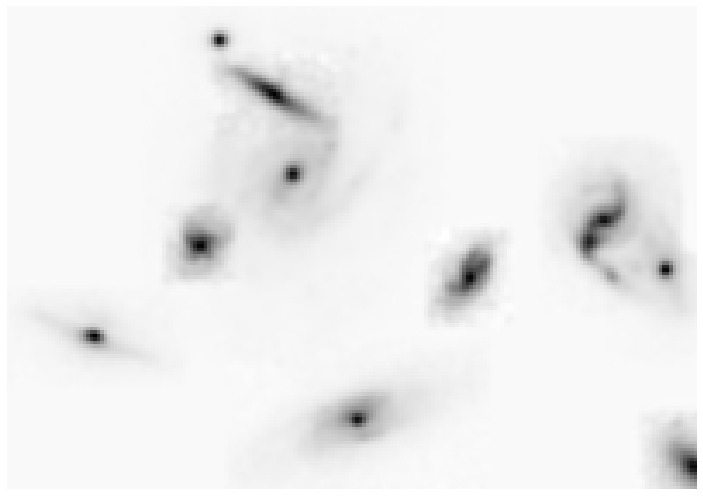

In [203]:
fig=pylab.figure(figsize=(10,7))
ax = fig.add_subplot(111)
im = make_scene(ax, cosmos_cat, nobj=nobj, psf=psf, xsize=xsize, ysize=ysize, seed=seed,
               add_ellipses=False)
fig.tight_layout()
fig.savefig("wl_scene_no_ellipse.pdf")

galsim.hsm.ShapeData(image_bounds=galsim.BoundsI(xmin=1, xmax=28, ymin=1, ymax=28), moments_status=0, observed_shape=galsim.Shear((-0.41865314421273125+0.09253108241158098j)), moments_sigma=3.8982014656066895, moments_amp=138.68569946289062, moments_centroid=galsim.PositionD(x=14.314470695355055, y=14.882459510168042), moments_rho4=2.176997003055518, moments_n_iter=24, correction_status=-10)
galsim.PositionI(15,15)
83.76840108038087
0.39981828778918355
3.8982014656066895


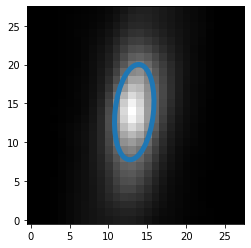